# PLN Mobile Review App - Sentiment Analysis (preprocessing)

Nama: Indri Windriasari <br>
Email: indriwindriasari2511@gmail.com

## Step 1: Installing and Importing Libraries


In [ ]:
# install
!pip install emoji
!pip install Sastrawi
!pip install python-Levenshtein
!pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.6 MB/s eta 0:00:00
  Cloning https://github.com/ariaghora/mpstemmer.git to /tmp/pip-req-build-xofz5o1k
  Running command git clone --filter=blob:none --quiet https://github.com/ariaghora/mpstemmer.git /tmp/pip-req-build-xofz5o1k
  Resolved https://github.com/ariaghora/mpstemmer.git to commit 25a5fd923af163a7eac3a5ec976984156ca8fa8b
  Preparing metadata (setup.py) ... done
  Created wheel for mpstemmer: filename=mpstemmer-0.1.0-py3-none-any.whl size=99802 sha256=4c5206cdc4aa3ec4f72ad70e28bd72c8eb2e945d5ec6ccb8e102294922d35a77
  Stored in directory: /tmp/pip-ephem-wheel-cache-k4bgqdwy/wheels/e0/b7/dd/9a80a3b7a05fe9e3252476ddf25da4faabddcec1b9e88fc32c
Successfully built mpstemmer


In [ ]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string, requests
from io import StringIO

# Text processing
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud

# Download necessary datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Step 2: Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file_path = '/content/drive/MyDrive/COLAB NOTEBOOKS/Dicoding/dataset/pln-mobile.csv'
df_pln = pd.read_csv(csv_file_path)

In [ ]:
df_pln.sample(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
95472,e1bab0b5-f3af-4e4e-afee-d06b63c224c7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Terimah kasih PLN 123 hidup terang, apk ini sn...",5,0,5.2.26,2022-09-11 09:32:37,"Hi Kak Asri. Makasih yah buat bintangnya, semo...",2022-09-11 10:35:35,5.2.26
31113,5aed5c5d-56d6-48cf-a619-2a29840bd01c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Alhamdulilah pelayanan PLN cepat & tepat, list...",5,0,5.2.54,2024-06-29 11:59:35,"Hai Kak Joe, terima kasih sudah memberikan rat...",2024-07-31 16:13:51,5.2.54


In [ ]:
# Inspect the dataset
df_pln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184500 entries, 0 to 184499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              184500 non-null  object
 1   userName              184500 non-null  object
 2   userImage             184500 non-null  object
 3   content               184500 non-null  object
 4   score                 184500 non-null  int64 
 5   thumbsUpCount         184500 non-null  int64 
 6   reviewCreatedVersion  163201 non-null  object
 7   at                    184500 non-null  object
 8   replyContent          182226 non-null  object
 9   repliedAt             182226 non-null  object
 10  appVersion            163201 non-null  object
dtypes: int64(2), object(9)
memory usage: 15.5+ MB


## Step 3: Data Preprocessing
- Label the sentiment as `positive`, `negative`, or `neutral` based on the score.
- Remove unnecessary columns and handle missing values.

In [ ]:
# Label the sentiment
df_pln['label'] = df_pln['score'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

In [ ]:
df_pln.sample(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,label
124180,db6d7d93-11b1-4f91-929a-1e24a800afa2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk yang sangat membantu (bagus),5,0,NaN,2024-05-31 01:34:39,"Hai Kak Dewi, tks ya Kak penilaiannya. Semoga ...",2024-05-31 02:45:54,NaN,positive
135134,a426bd4f-a170-44a4-8b91-34c295ed6765,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasinya bermanfaat,5,0,NaN,2024-08-27 01:14:34,Hai Kak Irma. Tengkyu ya Kak penilaiannya buat...,2024-08-27 03:02:52,NaN,positive


In [ ]:
print(df_pln['label'].value_counts())

label
positive    163009
negative     17700
neutral       3791
Name: count, dtype: int64


In [ ]:
# Drop unused columns
df_pln = df_pln.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'repliedAt', 'replyContent', 'appVersion'])

In [ ]:
df_pln.sample(3)

,content,score,at,label
144881,PLN mobile bagus,5,2023-11-11 09:03:12,positive
135527,Utk laporan gangguan gak bisa sama sekali,2,2021-11-13 08:07:06,negative
45673,"Susah di update sudah semingguan gagal mulu, p...",2,2022-01-06 19:36:32,negative


In [ ]:
df_pln.shape

(184500, 4)

In [ ]:
df_pln.to_csv('/content/drive/MyDrive/COLAB NOTEBOOKS/Dicoding/dataset/pln-mobile2.csv')

## Step 4: Data Preprocessing Lanjutan

In [ ]:
use_dataset = '/content/drive/MyDrive/COLAB NOTEBOOKS/Dicoding/dataset/pln-mobile2.csv'
df_pln = pd.read_csv(use_dataset)

In [ ]:
df_pln.isnull().sum()

,0
Unnamed: 0,0
content,0
score,0
at,0
label,0


In [ ]:
slangwords1 = pd.read_csv('https://raw.githubusercontent.com/fendiirfan/Kamus-Alay/main/Kamus-Alay.csv')
slangwords1 = slangwords1.set_index('kataAlay')

In [ ]:
slangwords2 = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')
slangwords2 = slangwords2.filter(['slang', 'formal'], axis=1)
slangwords2 = slangwords2.drop_duplicates(subset=['slang'], keep='first')
slangwords2 = slangwords2.set_index('slang')

In [ ]:
stopword1   = list(pd.read_csv('https://raw.githubusercontent.com/datascienceid/stopwords-bahasa-indonesia/master/stopwords_id_satya.txt', header = None)[0])
custom_word = ['nya', 'tolong', 'iya', 'guna', 'kasih', 'buka', 'hari', 'sih', 'mohon', 'baru', 'pln', 'aplikasi', 'apl', 'apk', 'mobile', 'plnn']

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def cleaningText(text):
    text = remove_emoji(text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'(\w)(\1{2,})', r"\1", text) #will replace repated char
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def filteringText(text): # Remove stopwors in a text
    #stopword
    text_split = text.split(' ')
    for i in range(len(text_split)): #Mencari kata slang dan diganti dengan list kata formal
      if text_split[i] in slangwords1.index:
        text_split[i] = slangwords1.loc[text_split[i]]['kataBaik']
      elif text_split[i] in slangwords2.index:
        text_split[i] = slangwords2.loc[text_split[i]]['formal']
      else:
        pass
    temp_text_split = []
    for i in range(len(text_split)):
      if (text_split[i] not in stopword1) and (text_split[i] not in custom_word) and (type(text_split[i]) == str):
        temp_text_split.append(text_split[i])
    text = ' '.join(temp_text_split)
    return text

In [ ]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

In [ ]:
from mpstemmer import MPStemmer

def stemmingText(text):
    stemmer = MPStemmer()
    stemmed_text = [stemmer.stem(word) for word in text]
    return ' '.join(stemmed_text)

In [ ]:
# Apply preprocessing steps to the 'content' column
df_pln['text_clean'] = df_pln['content'].apply(cleaningText)
df_pln['text_clean'] = df_pln['text_clean'].apply(casefoldingText)
df_pln['text_clean'] = df_pln['text_clean'].apply(filteringText)

# Tokenize and stem the text
df_pln['text_preprocessed'] = df_pln['text_clean'].apply(tokenizingText)
df_pln['text_preprocessed'] = df_pln['text_preprocessed'].apply(stemmingText)

In [ ]:
df_pln.shape

(184500, 7)

In [ ]:
df_pln.drop_duplicates(subset = 'text_clean', inplace = True)

In [ ]:
df_pln.shape

(117476, 7)

## Step 5: Visualization


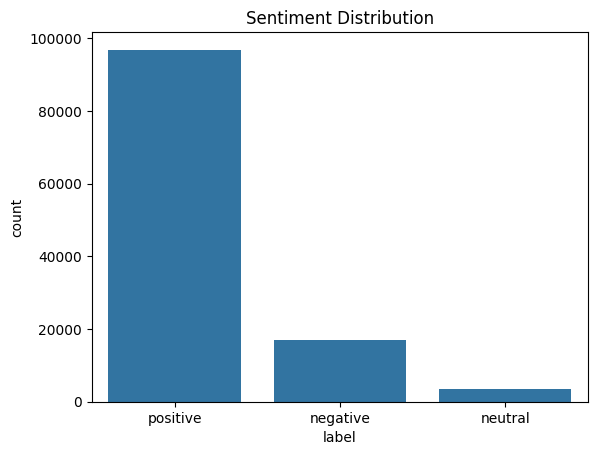

In [ ]:
# Visualize the sentiment distribution
sns.countplot(x=df_pln["label"])
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
# Menambahkan kolom baru 'WordsCount' yang menghitung jumlah kata dalam setiap baris kolom 'text_preprocessed'
df_pln["WordsCount"] = df_pln["text_preprocessed"].apply(lambda x: len(x))

# Memfilter dataframe untuk menyimpan hanya baris yang memiliki jumlah kata >= 2
df_pln = df_pln[df_pln["WordsCount"] >= 2]

# Menghapus baris yang memiliki jumlah kata tepat 2
df_pln = df_pln[df_pln.WordsCount != 2]

In [ ]:
# Menghapus kolom 'WordsCount' yang tidak diperlukan lagi setelah pemfilteran
df_pln = df_pln.drop(['WordsCount'], axis=1)

In [ ]:
df_pln = df_pln.dropna()
df_pln.isnull().sum()
df_pln = df_pln.reset_index(drop=True)

In [ ]:
df_pln.shape

(117468, 7)

label
positive    96802
negative    17076
neutral      3590
Name: count, dtype: int64


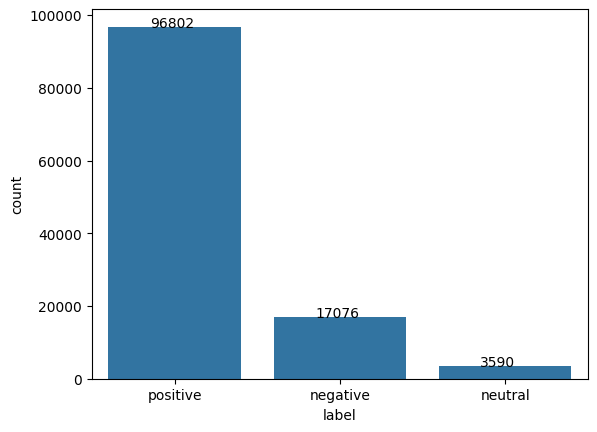

In [ ]:
print(df_pln['label'].value_counts())
ax = sns.countplot(x=df_pln["label"])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.02))

sns.set(rc={'figure.figsize':(9,3)})
plt.show()

In [ ]:
df_pln.to_csv('/content/drive/MyDrive/COLAB NOTEBOOKS/Dicoding/dataset/pln-mobile3.csv')